# Mercedes Price Prediction

In [101]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

***Here is the some question which have been taken from Mercedese dataset***
+ How many car models we have?
+ Which are the most popular models?
+ Which type of car models we have in this data?
+ Which are the most popular cars?
+ which are top 5 car most popular?
+ What are the cars mileage?
+ Which are the top 10 cars mileages wise?
+ Which are the top 5 cars with low mileages?
+ In which year most cars sale?
+ What are car models sale in which year and what is the price range?
+ Which transmission most populated in sold cars and what are the price range?
+ Which fuel type car has higher price?
+ Which fuel type car has higher mileage?
+ How is relationship between features Engine Size, MPG, Mileage and Price? And finally
+ How correlation between all features? 


### Import the data

In [102]:
df = pd.read_csv("merc.csv", low_memory=False)

In [103]:
print("The shape of data:", df.shape)
df.head().T

The shape of data: (13119, 9)


,0,1,2,3,4
model,SLK,S Class,SL CLASS,G Class,G Class
year,2005,2017,2016,2016,2016
price,5200,34948,49948,61948,73948
transmission,Automatic,Automatic,Automatic,Automatic,Automatic
mileage,63000,27000,6200,16000,4000
fuelType,Petrol,Hybrid,Petrol,Petrol,Petrol
tax,325,20,555,325,325
mpg,32.1,61.4,28,30.4,30.1
engineSize,1.8,2.1,5.5,4,4


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


### Describe statstics summary on categorical features data

In [5]:
df.describe(include="O")

,model,transmission,fuelType
count,13119,13119,13119
unique,27,4,4
top,C Class,Semi-Auto,Diesel
freq,3747,6848,9187


### Describe statstics summary on numerical features data

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


***How many car models we have?***

In [7]:
len(df.model.unique())

27

This dataset have 27 car models

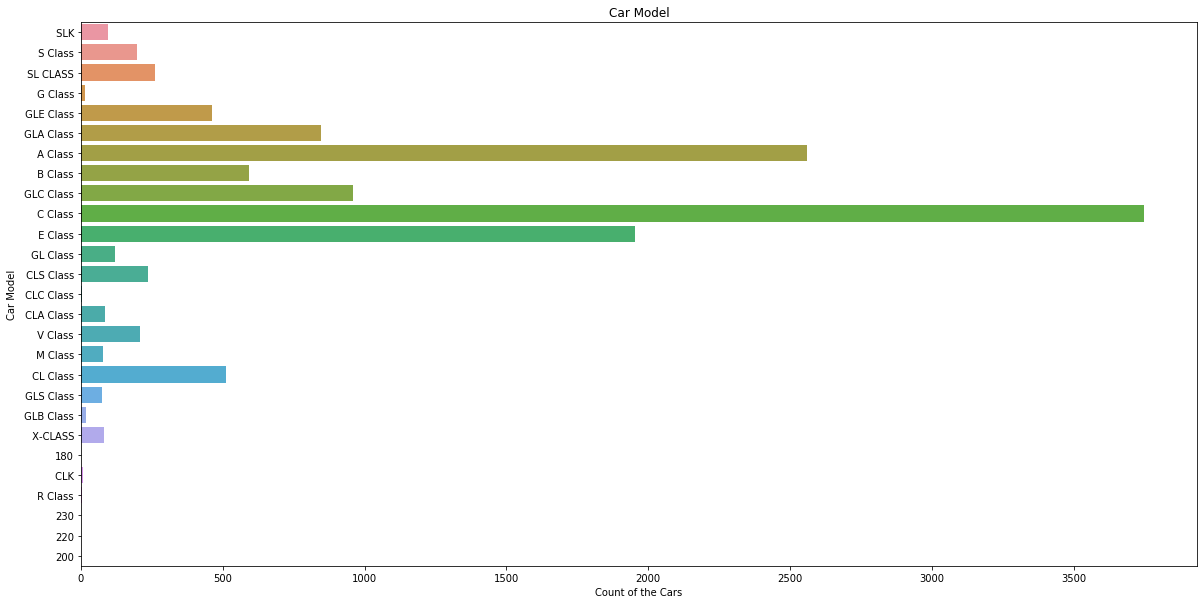

In [8]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(y='model', data=df);
plt.title("Car Model");
plt.xlabel("Count of the Cars");
plt.ylabel("Car Model");

***Which type of car models we have in this data?***

In [ ]:
df.model.unique().tolist()    

***Which are the most popular cars?***

In [10]:
df.model.value_counts()

 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
180              1
200              1
220              1
230              1
Name: model, dtype: int64

***Which are top 5 car most popular?***

In [11]:
df.model.value_counts().nlargest(5)

 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
Name: model, dtype: int64

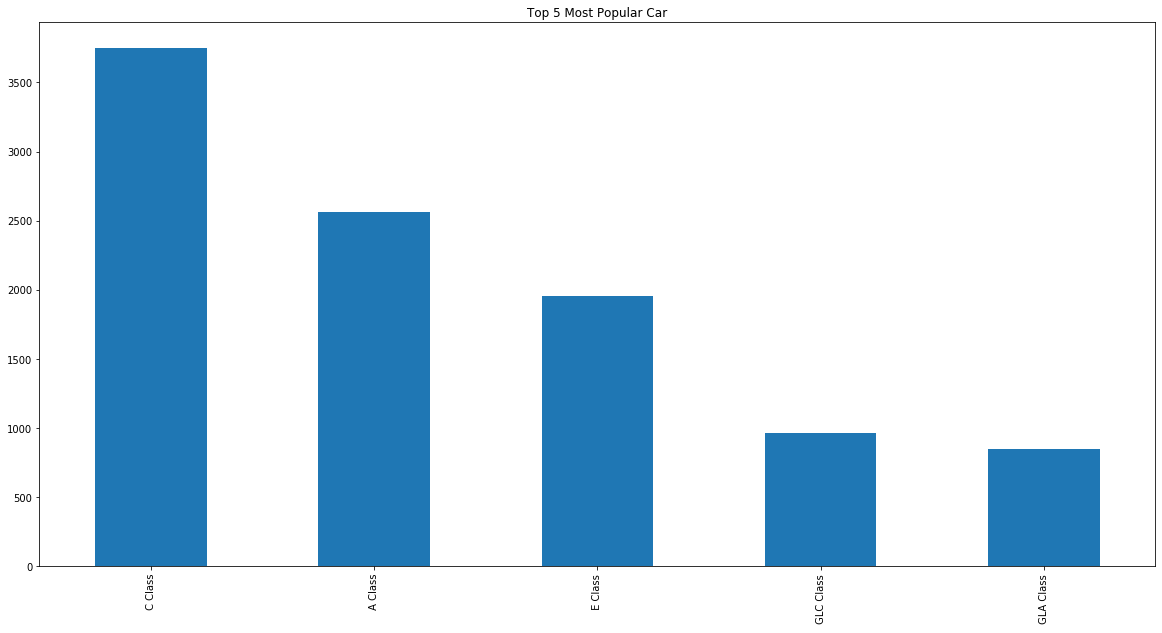

In [12]:
plt.figure(figsize=(20,10))
df.model.value_counts().nlargest(5).plot(kind='bar')
plt.title("Top 5 Most Popular Car");

***What are the cars mileage?***

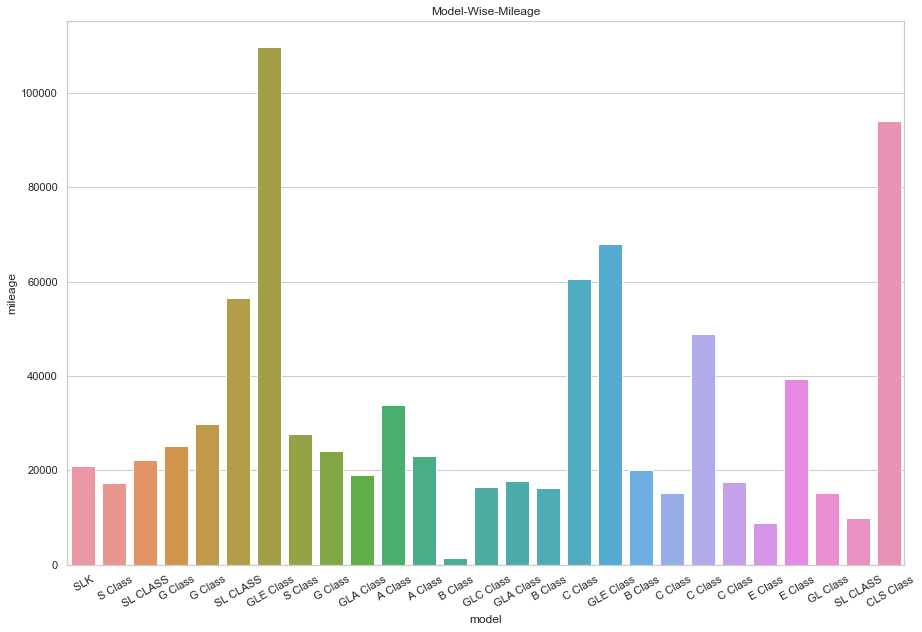

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
mileage_wise_price = df.groupby('model')['mileage'].mean().reset_index()
m=sns.barplot(x='model', y='mileage', data=mileage_wise_price);
m.set_xticklabels(df['model'].values,rotation=30)
plt.title("Model-Wise-Mileage")
plt.show()

***Which are the top 10 cars mileages wise?***

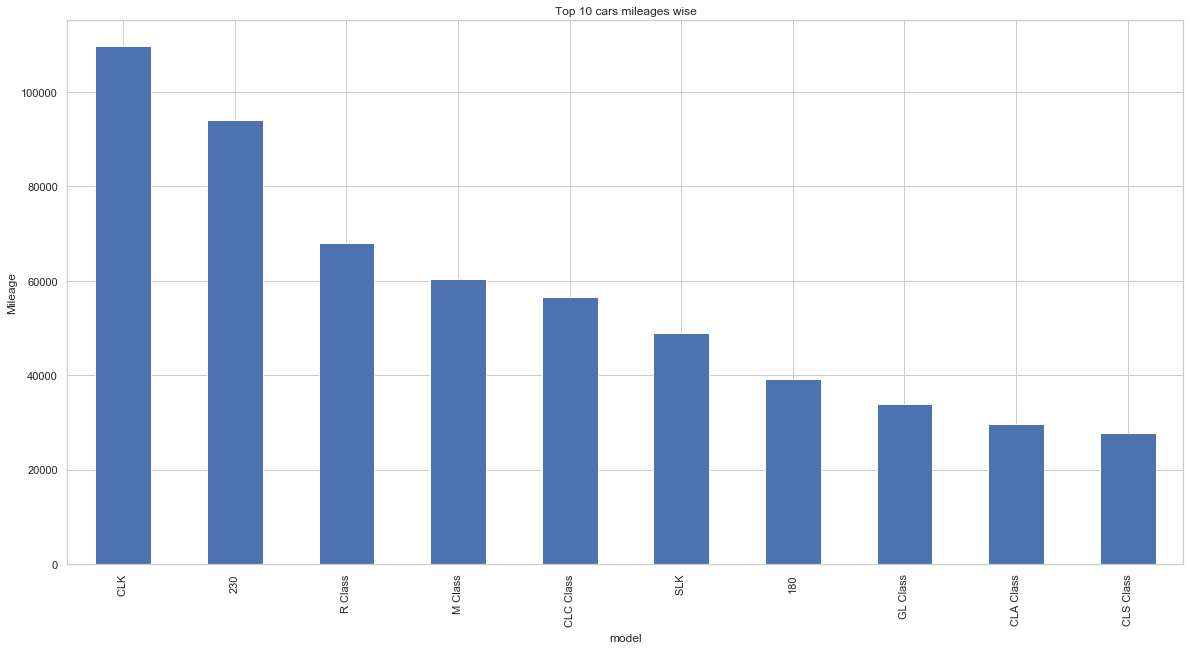

In [14]:
plt.figure(figsize=(20,10))
df.groupby('model')['mileage'].mean().sort_values().nlargest(10).plot(kind='bar')
plt.title( "Top 10 cars mileages wise")
plt.ylabel("Mileage")
plt.show()

***Which are the top 5 cars with lowest mileage?***

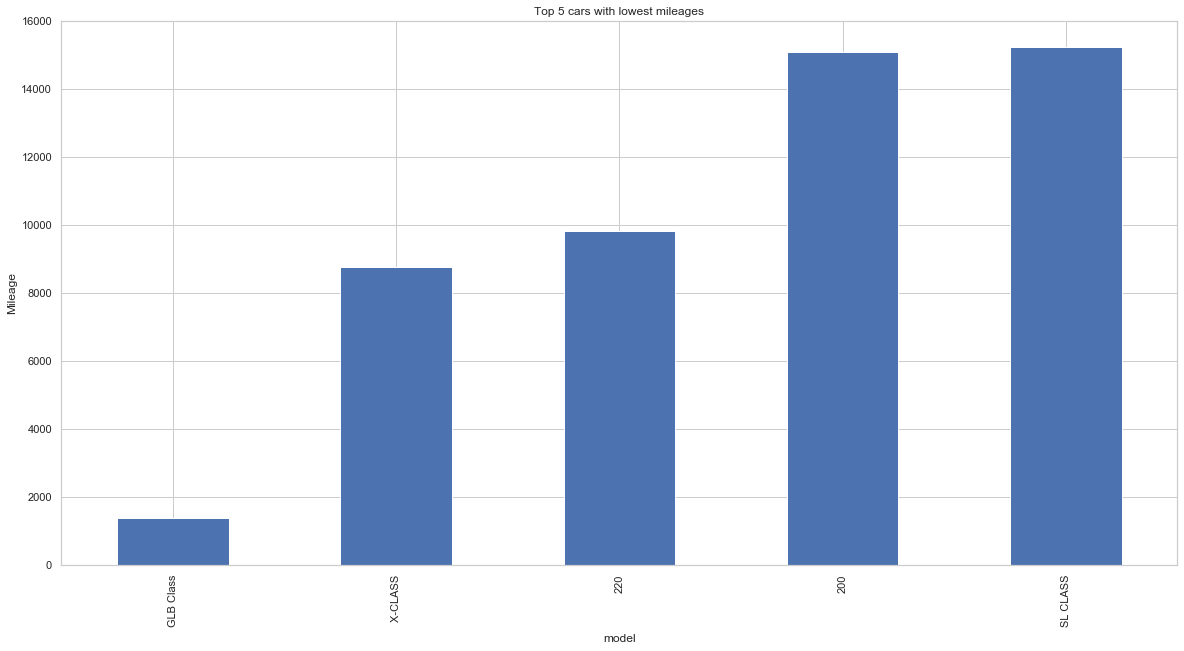

In [15]:
plt.figure(figsize=(20,10))
df.groupby('model')['mileage'].mean().sort_values().nsmallest(5).plot(kind='bar')
plt.title( "Top 5 cars with lowest mileages")
plt.ylabel("Mileage")
plt.show()

***In which year most cars sale?***

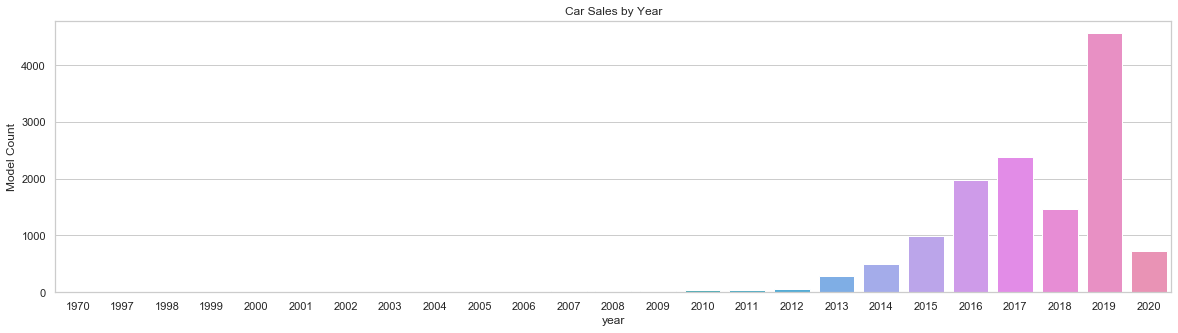

In [16]:
plt.figure(figsize=(20, 5))
year_sale_model = df.groupby('year')['model'].count().reset_index()
c = sns.barplot(x='year', y='model', data=year_sale_model)
c.set_title("Car Sales by Year")
c.set_ylabel("Model Count")
plt.show()

***What are car models sale in which year and what is the price range?***

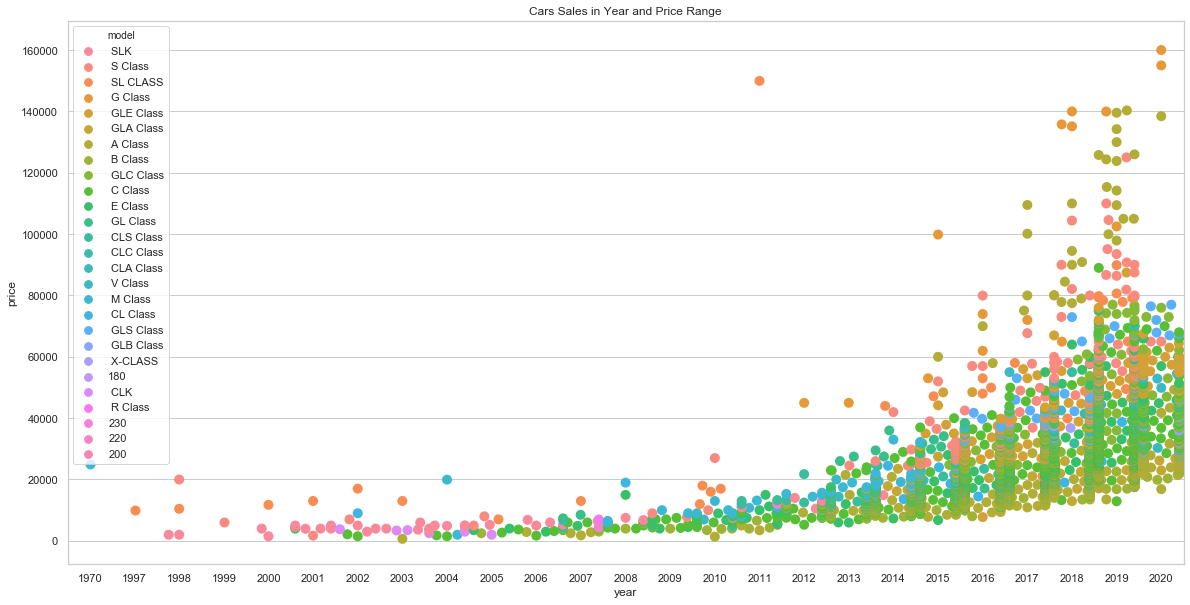

In [17]:
plt.figure(figsize=(20, 10))
y=sns.swarmplot(x='year', hue='model',y='price', data=df, size=10);
y.set_title("Cars Sales in Year and Price Range");

***Which transmission most populared in sold cars and what are the price range?***

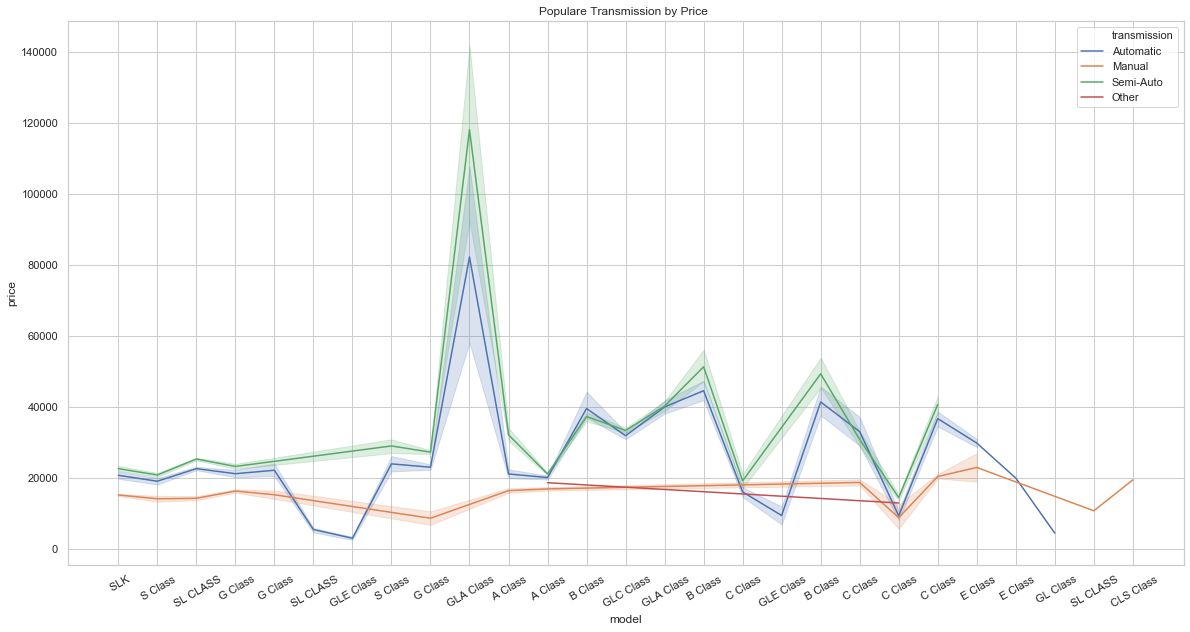

In [18]:
plt.figure(figsize=(20, 10))
f = sns.lineplot(x='model', y='price', hue='transmission', data=df)
f.set_xticklabels(df['model'].values, rotation=30)
f.set_title("Populare Transmission by Price ")
plt.show()

+ We can see above most populated technology Semi-Auto and Automatic

***Which fuel type car has highe price?***

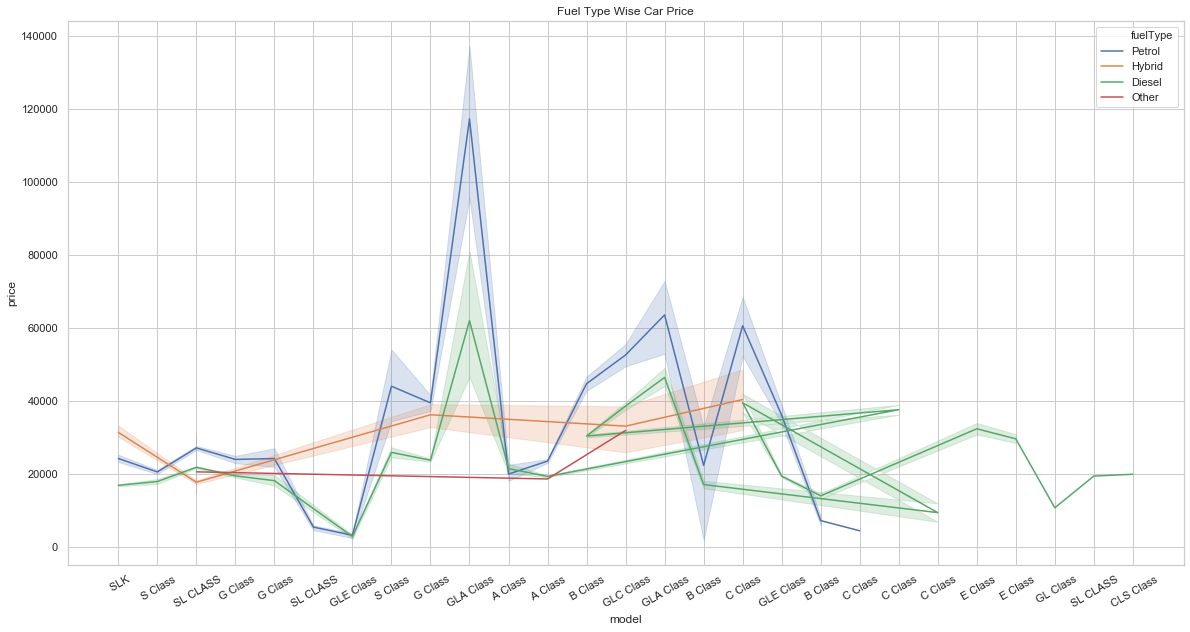

In [19]:
plt.figure(figsize=(20, 10))
f = sns.lineplot(x='model', y='price', hue='fuelType', data=df)
f.set_xticklabels(df['model'].values, rotation=30)
plt.title("Fuel Type Wise Car Price");



***Which fuel type car has higher mileage?***

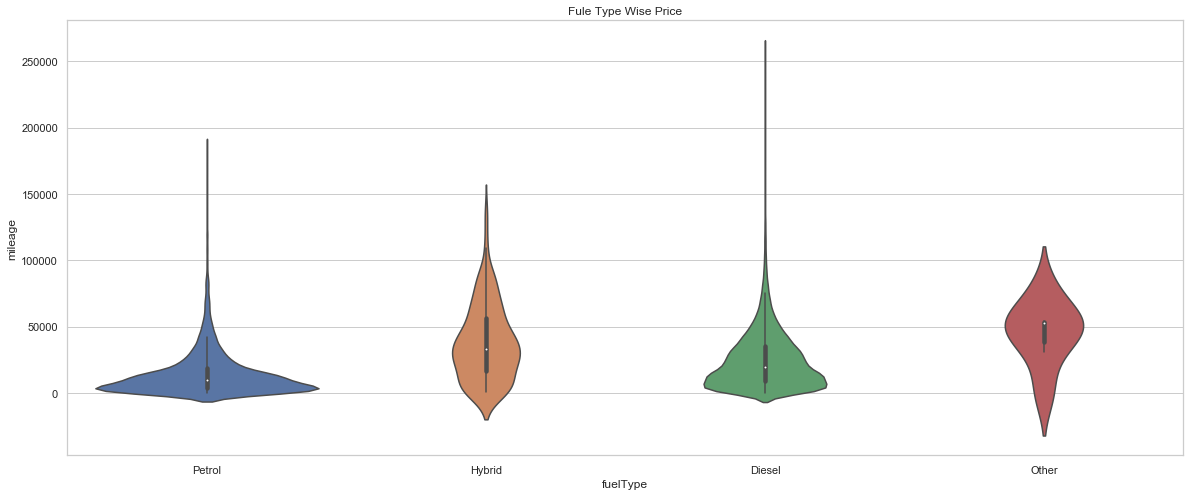

In [20]:
plt.figure(figsize=(20, 8))
sns.violinplot(y='mileage', x='fuelType', data=df);
plt.title("Fule Type Wise Price");

In [47]:
#Let's convert categorical features to numbers

labelencoder = LabelEncoder()
df = df.apply(lambda col: labelencoder.fit_transform(col))

***How is relatationship between features Engine Size, MPG, Mileage and Price?***

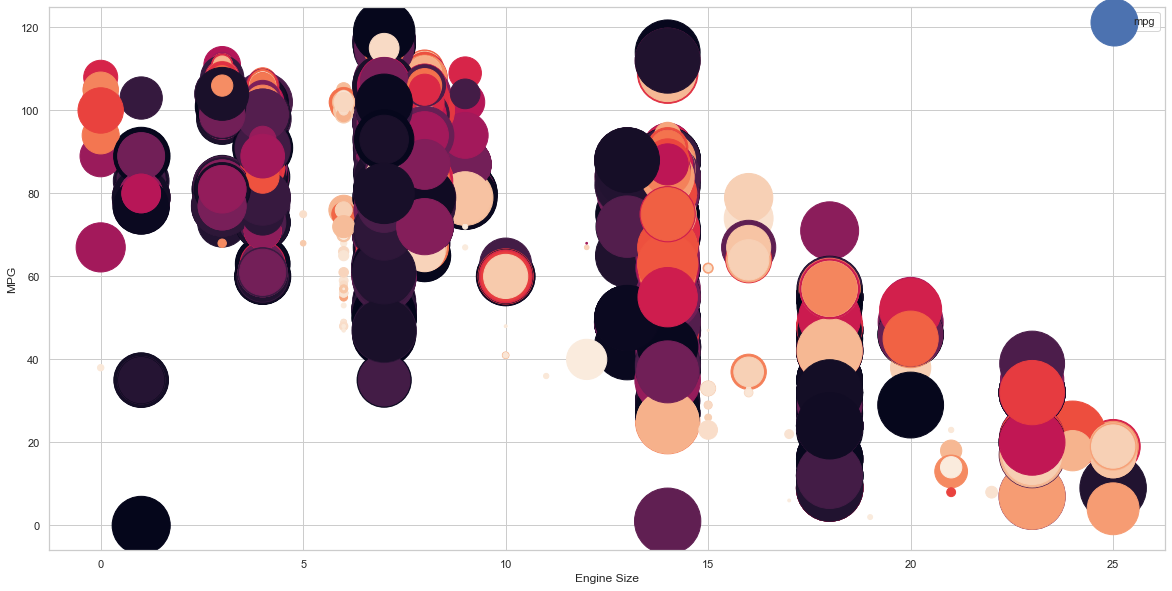

In [22]:
plt.figure(figsize=(20,10))
plt.scatter('engineSize', 'mpg', c='mileage', s='price', data=df)
plt.legend()
plt.xlabel('Engine Size')
plt.ylabel('MPG')
plt.show()

***Now let's plot the correlation matrix***

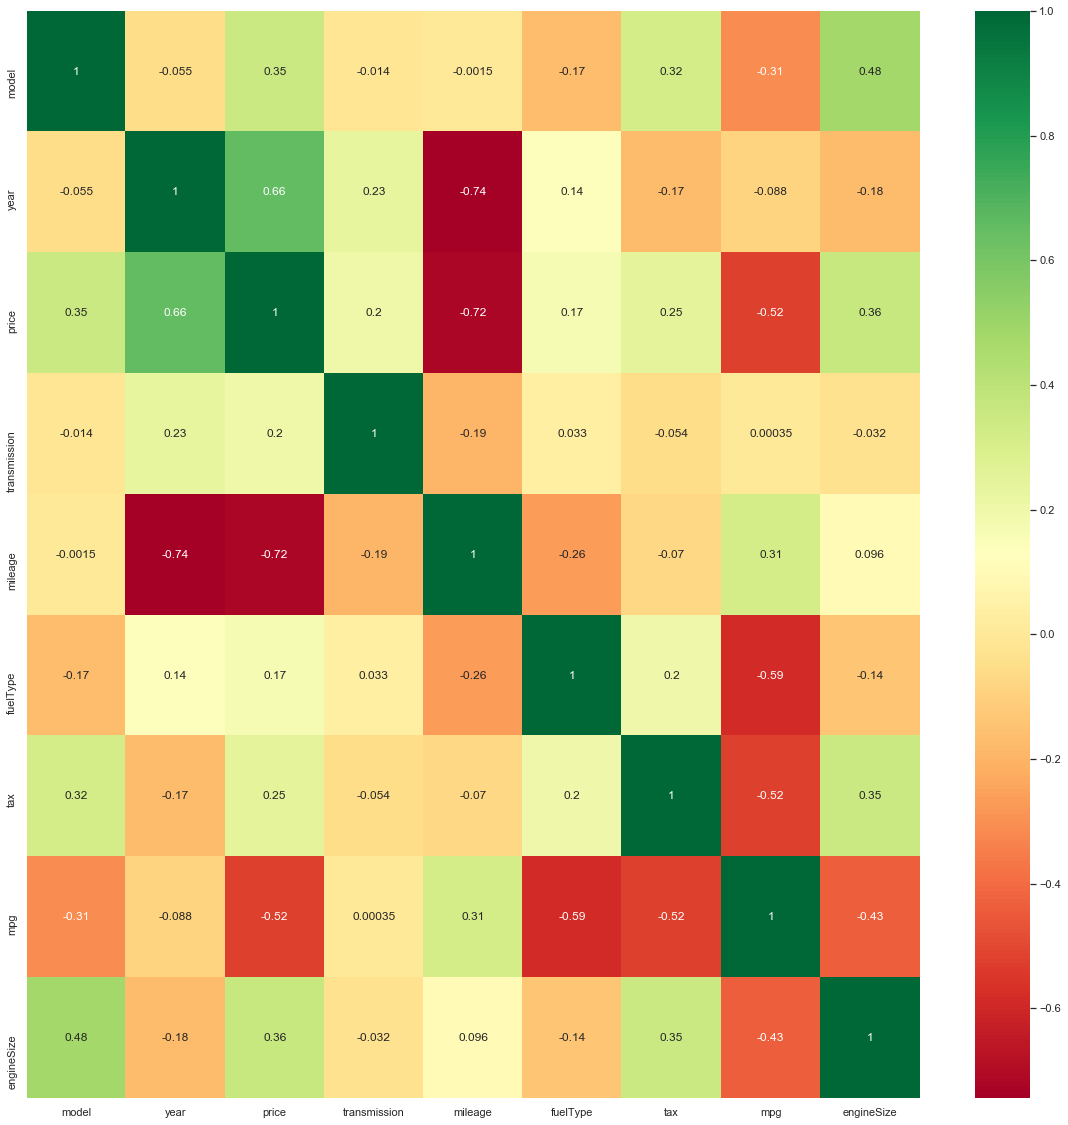

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn");

In [86]:
#Let's make X & y

X = df.drop("price", axis=1)
y = df["price"]

# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10495, 8), (10495,), (2624, 8), (2624,))

### Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

lin = LinearRegression().fit(X_train, y_train)
pred = lin.predict(X_test).round(2)
print(f'Linear Model Coefficient (w) :{(lin.coef_)}')
print(f'Linear Model Intercept (b) :{(lin.intercept_).round(2)}')
print("R^2 score on train:", lin.score(X_train, y_train).round(2))
print("R^2 score on test", lin.score(X_test, y_test).round(2))
print("Mean absolue error (MAE):", mean_absolute_error(y_test, pred))
print("Mean squared error (MSE):", mean_squared_error(y_test, pred))

Linear Model Coefficient (w) :[ 2.88104595e+01  2.23598069e+02  3.58936240e+01 -1.39308798e-01
 -3.49202926e+01  1.34491426e+01 -1.12986619e+01  8.73314595e+01]
Linear Model Intercept (b) :-2035.83
R^2 score on train: 0.82
R^2 score on test 0.82
Mean absolue error (MAE): 376.21115853658534
Mean squared error (MSE): 230239.3243070884


***Plot the prediction & actual sales price with X_test set for understading how speared prediction & Actual price with features***

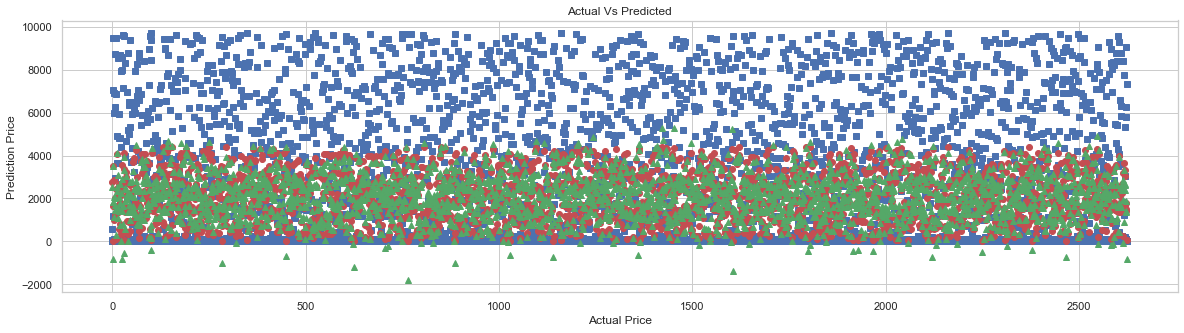

In [94]:
plt.figure(figsize=(20,5))
lent = [i for i in range(len(X_test))]
plt.plot(lent, X_test, 'bs')
plt.plot(lent, y_test, 'ro')
plt.plot(lent, pred, 'g^')
plt.title("Actual Vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.show()

***Plot the Prediction vs Actual***

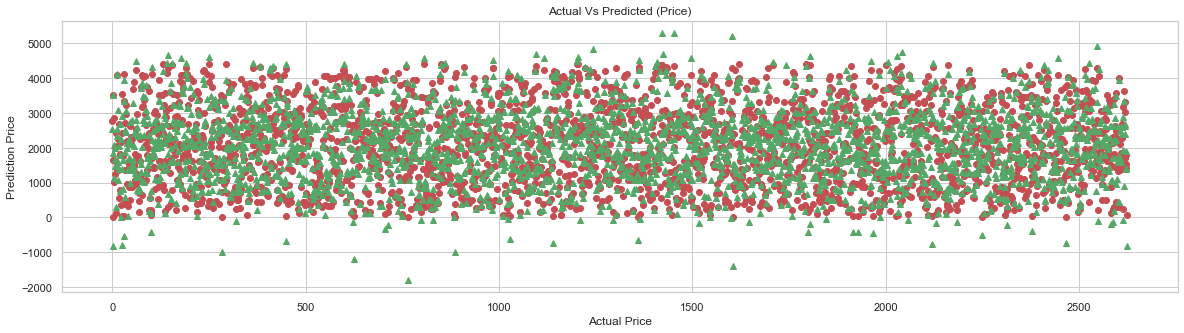

In [96]:
plt.figure(figsize=(20,5))
lent = [i for i in range(len(X_test))]
plt.plot(lent, y_test, 'ro')
plt.plot(lent, pred,'g^')
plt.title("Actual Vs Predicted (Price)")
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.show()

### Plot the Error rate (Actual-Prediction)

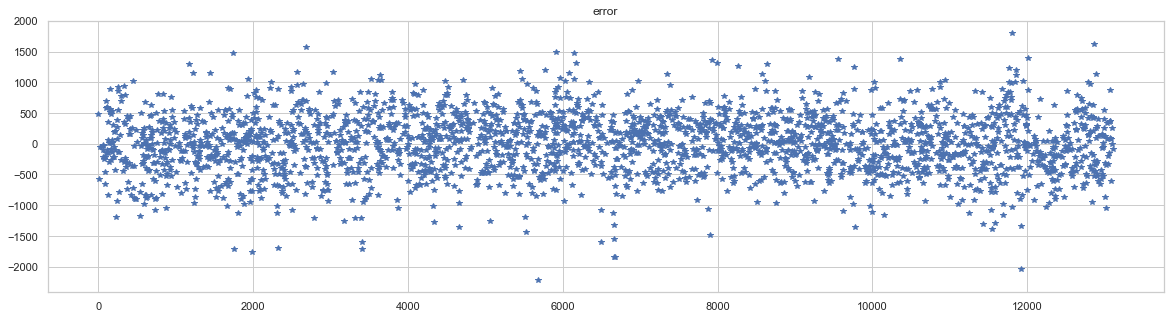

In [51]:
plt.figure(figsize=(20,5))
plt.plot(y_test-pred, 'b*')
plt.title("error")
plt.show()

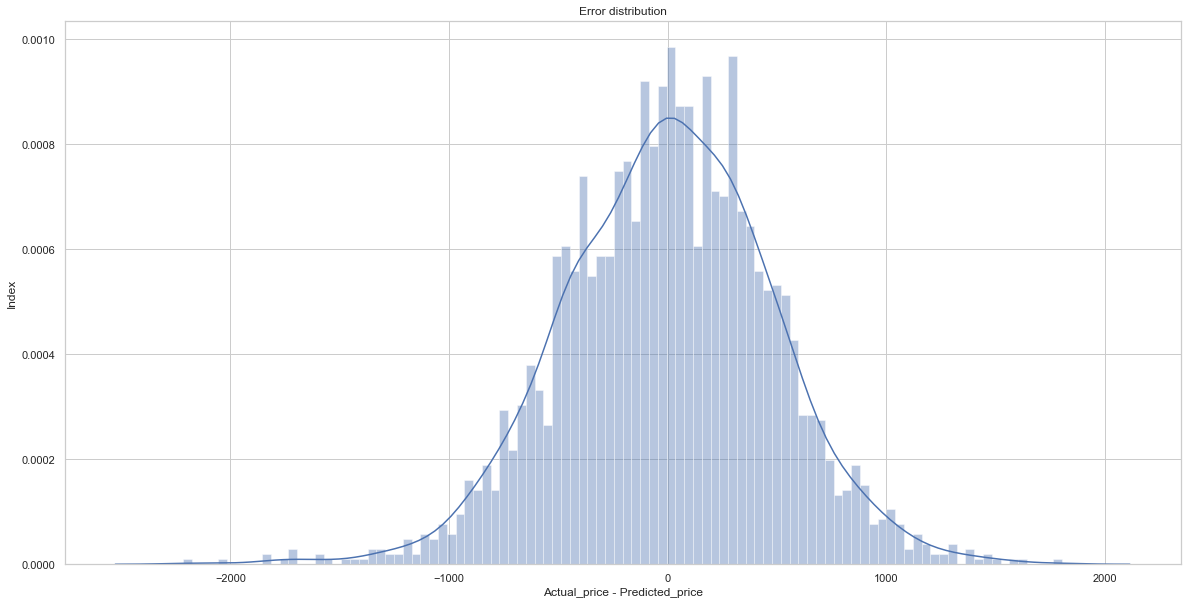

In [83]:
# Error distribution
plt.figure(figsize=(20,10))
sns.distplot(y_test - pred, bins=100)
plt.xlabel('Actual_price - Predicted_price')
plt.ylabel('Index')
plt.title('Error distribution')
plt.show()

In [68]:
df_model = pd.DataFrame(data={"Actual Value": y_test,
                             "Predicted Value": y_pred})
df_model["Difference"] = df_model["Predicted Value"].round(2)-df_model['Actual Value']
df_model[:10]

,Actual Value,Predicted Value,Difference
7669,2769,2568.613522,-200.39
12851,1661,1828.086849,167.09
5195,3518,3544.174762,26.17
11413,22,-381.021202,-403.02
348,2867,2068.961061,-798.04
12121,1011,1087.249807,76.25
9913,1630,2047.465980,417.47
748,1245,1732.624353,487.62
1550,2024,1386.221201,-637.78
11071,120,358.322571,238.32


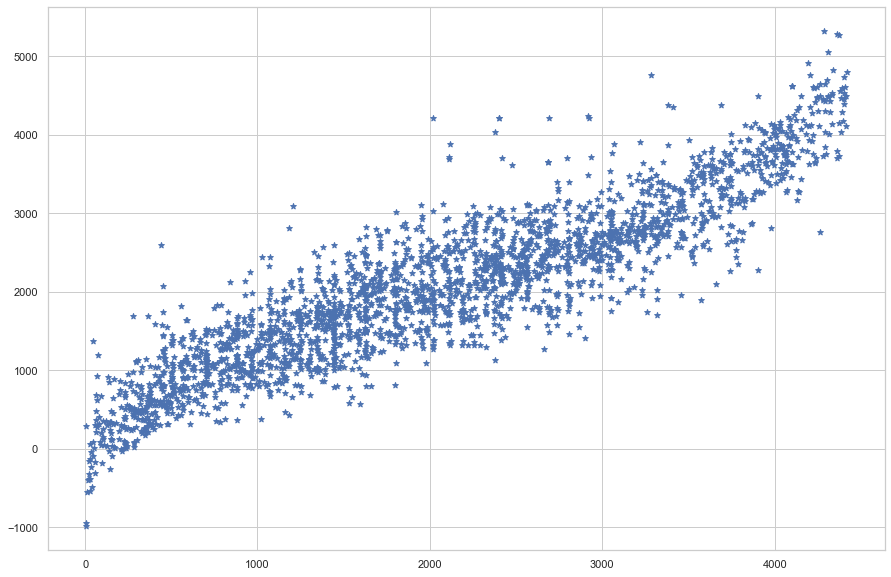

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(data=df_model, x='Actual Value', y="Predicted Value", marker="*")
plt.title("");

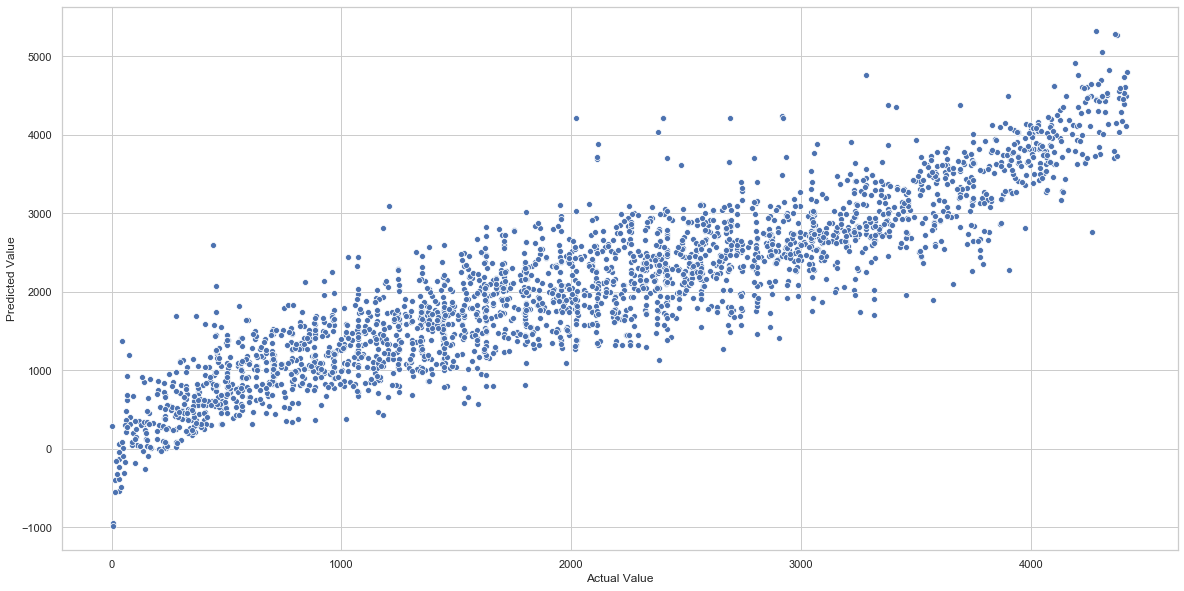

In [69]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Actual Value', y='Predicted Value', data=df_model);

### Random Forest Regressor


In [70]:
rfr = RandomForestRegressor(n_estimators=114, max_depth=15, random_state=100).fit(X_train, y_train)


In [71]:
print("R2", rfr.score(X_test, y_test))
prediction = rfr.predict(X_test)

R2 0.9523001700311385


***Plot the prediction & actual sales price with X_test set for understading how speared prediction & Actual price with features***

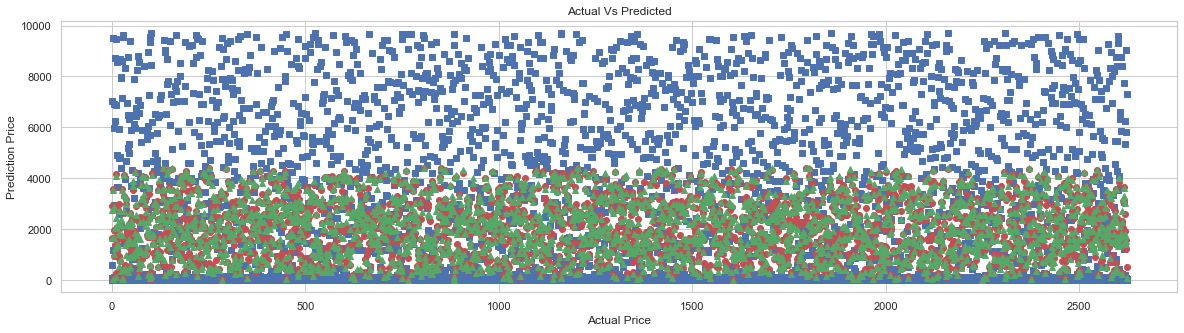

In [97]:
plt.figure(figsize=(20,5))
lent = [i for i in range(len(X_test))]
plt.plot(lent, X_test, 'bs')
plt.plot(lent, prediction, 'ro')
plt.plot(lent, y_test, 'g^')
plt.title("Actual Vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.show()

***Plot the Actual Vs Predicted***

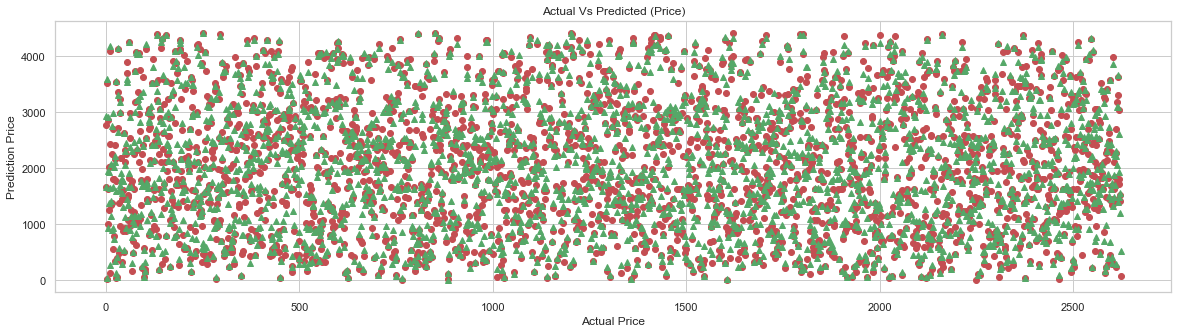

In [98]:
plt.figure(figsize=(20,5))
plt.plot(length, y_test, 'ro')
plt.plot(length, prediction,'g^')
plt.title("Actual Vs Predicted (Price)")
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.show()

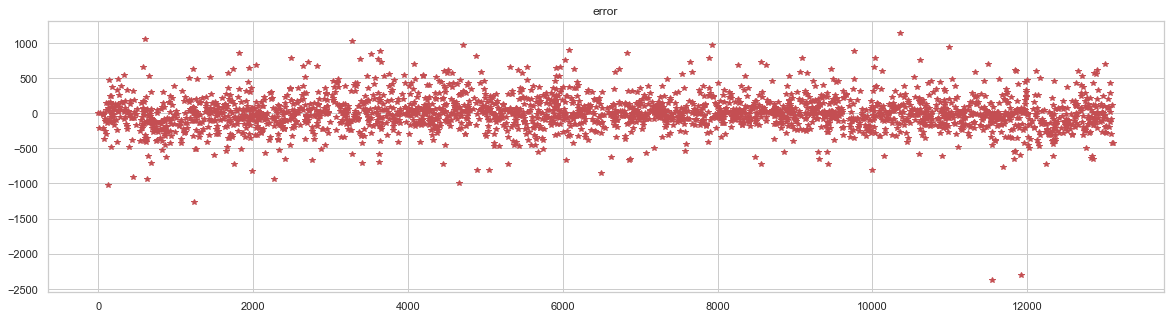

In [99]:
plt.figure(figsize=(20,5))
plt.plot(y_test-prediction, 'r*')
plt.title("error")
plt.show()

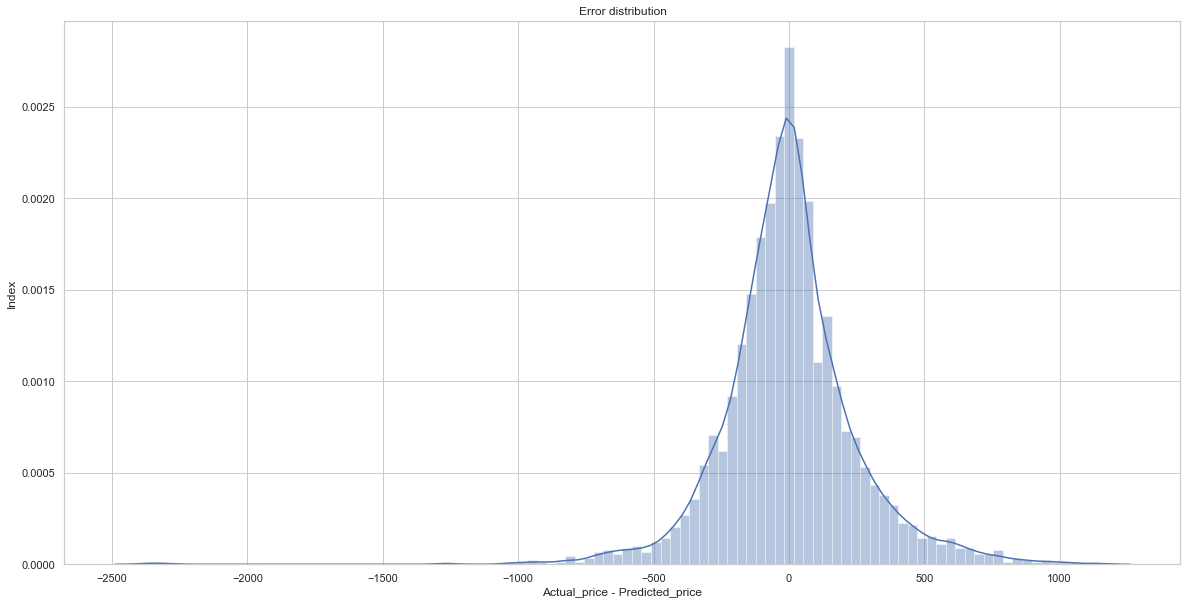

In [100]:
# Error distribution
plt.figure(figsize=(20,10))
sns.distplot(y_test - prediction, bins=100)
plt.xlabel('Actual_price - Predicted_price')
plt.ylabel('Index')
plt.title('Error distribution')
plt.show()